In [2]:
filePos = "./data/Do_1.wav"

In [3]:
from pydub import AudioSegment

c:\programdata\anaconda3\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [4]:
audio = AudioSegment.from_file(filePos)

In [5]:
import scipy.io.wavfile as wavfile

In [6]:
import matplotlib.pyplot as plt

In [7]:
[fs, wave] = wavfile.read(filePos)
wave = wave[:, 0]

In [8]:
wave.dtype
wave = wave / 2**15

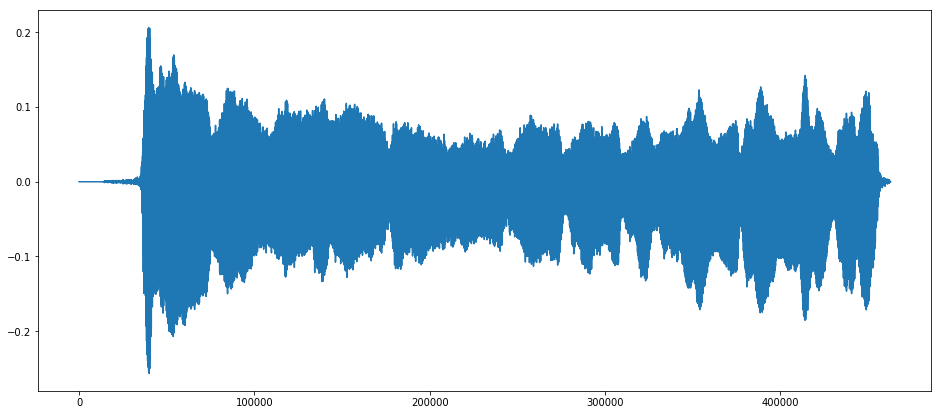

In [9]:
plt.figure(figsize=(16, 7))
plt.plot(wave)
plt.show()

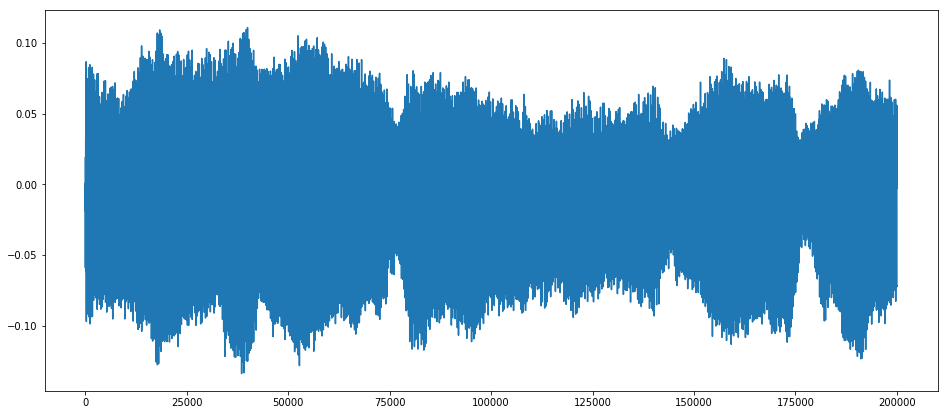

In [10]:
plt.figure(figsize=(16, 7))
y = wave[100000:300000]
plt.plot(y)
plt.show()

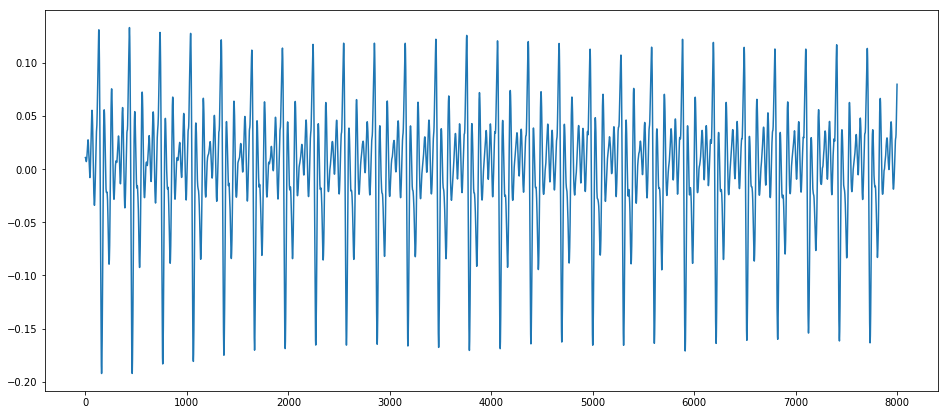

In [11]:
plt.figure(figsize=(16, 7))
start = 60000;
wavLen = 8000;
plt.plot(wave[start:start + wavLen])
plt.show()

In [12]:
import numpy as np
from scipy.signal import find_peaks

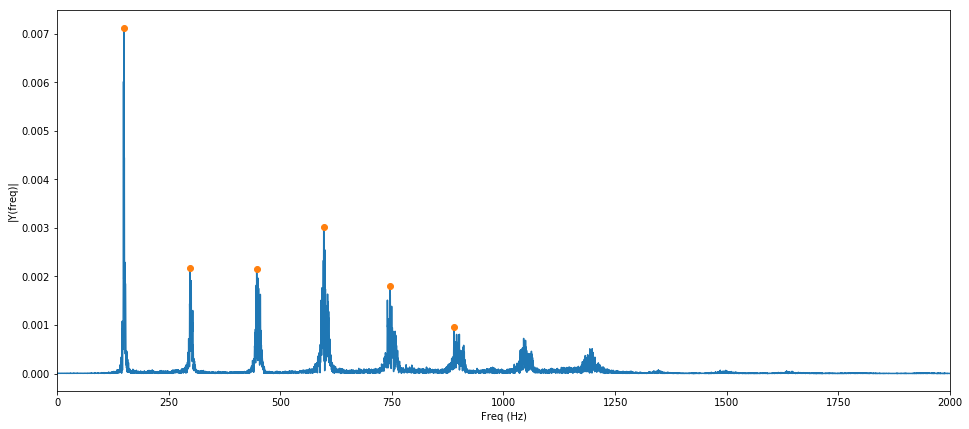

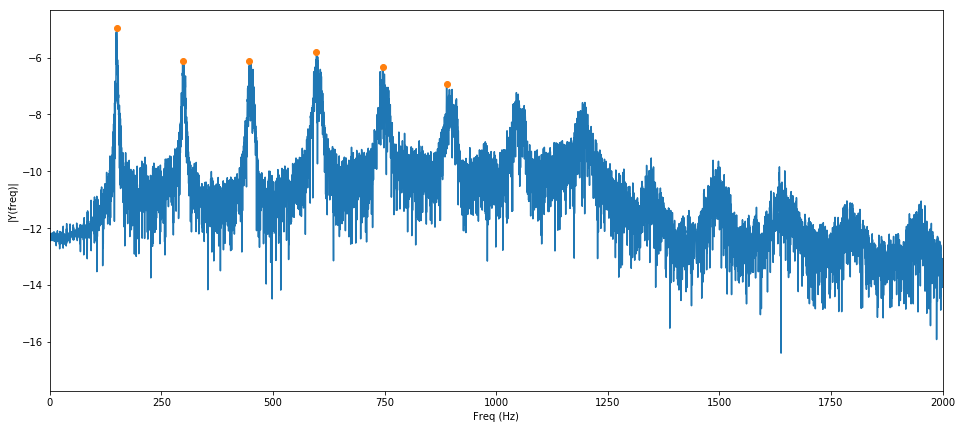

In [13]:
dt = 1.0/fs
time = np.arange(0, len(y)/fs, dt)

n = len(y) 
k = np.arange(n)
T = n/fs
freq = k/T 
freq = freq[range(np.int(n/2))]
Y = np.fft.fft(y)/n
Y = Y[range(np.int(n/2))]

plt.figure(figsize=(16, 7))
plt.plot(freq, abs(Y)) 
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')
plt.xlim([0, 2000])

x, _ = find_peaks(abs(Y), distance=100, height=0.0009)
x = x[x < 8000]

plt.plot(freq[x], abs(Y)[x], 'o')
plt.show()

plt.figure(figsize=(16, 7))
plt.plot(freq, np.log(abs(Y))) 
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')
plt.xlim([0, 2000])
plt.plot(freq[x], np.log(abs(Y)[x]), 'o')
plt.show()

In [14]:
harmonic = freq[x]

In [15]:
harmonic

array([149.7195, 297.4545, 447.174 , 597.3345, 745.29  , 888.8355])

In [16]:
wavShapeLen = int(1/harmonic[0] * fs)
print(wavShapeLen)

294


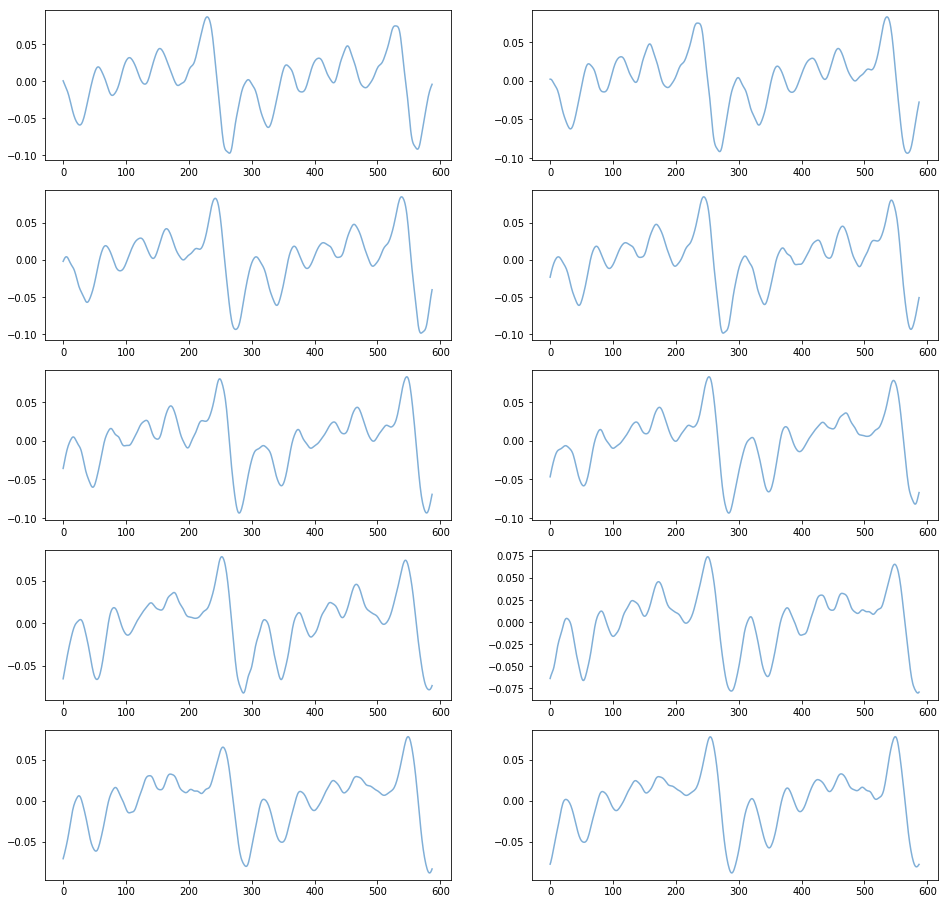

In [17]:
fig = plt.figure(figsize=(16, 16))
detSig = 0
for i in range(10):
    fig.add_subplot(5, 2, i+1)
    sig = y[i*wavShapeLen:(i+2)*wavShapeLen]
    plt.plot(sig, color=(3/255, 96/255, 176/255), alpha=0.5)
    if i == 0:
        detSig = sig
        

y length: 200000, wave length: 588, cov length: 6



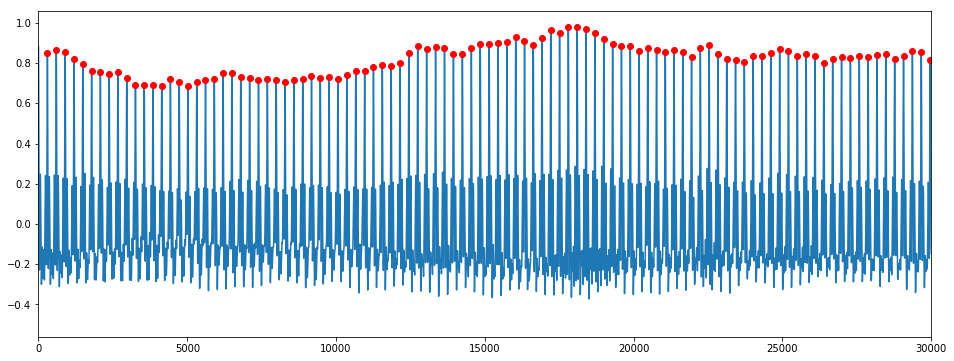

In [18]:
cor_y = np.correlate(y, detSig, mode='full')
cor_y = cor_y[len(detSig)-1:] 
plt.figure(figsize=(16, 6))
plt.plot(cor_y)
print('y length: {}, wave length: {}, cov length: {}\n'.format(len(y), len(detSig), len(x)))
x_, _ = find_peaks(cor_y, distance=wavShapeLen/4, height=0.3)
# x_ = x_[x_ < wavShapeLen * 20]
plt.plot(x_, cor_y[x_], 'ro')
plt.xlim([0, 30000])
plt.show()

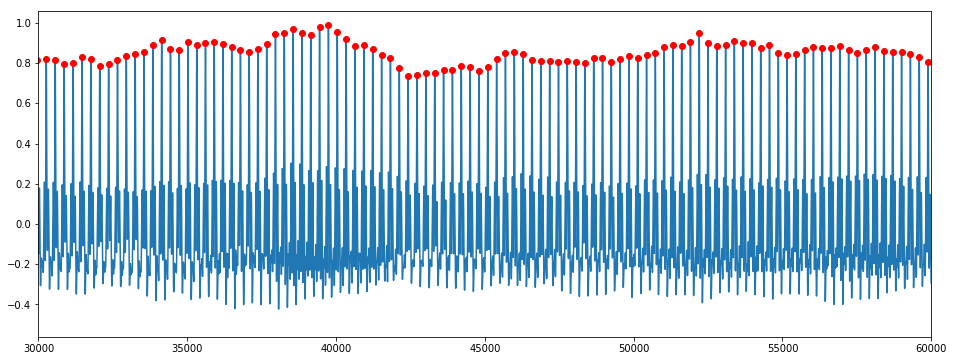

In [19]:
plt.figure(figsize=(16, 6))
plt.plot(cor_y)
plt.plot(x_, cor_y[x_], 'ro')
plt.xlim([30000, 60000])
plt.show()

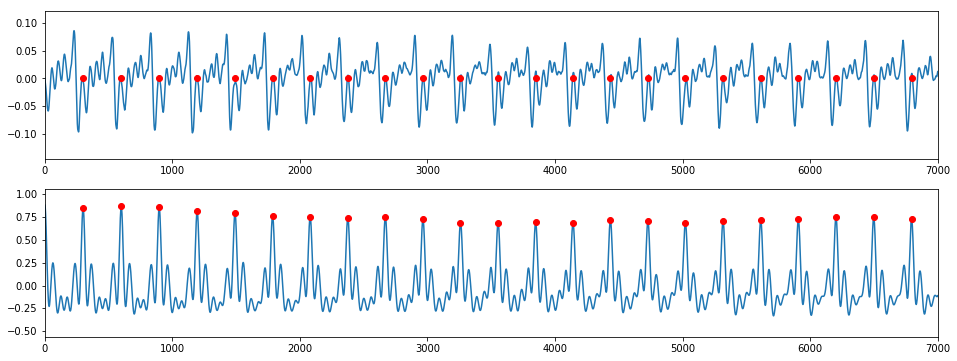

In [20]:
plt.figure(figsize=(16, 6))
plt.subplot(2, 1, 1)
plt.plot(y)
plt.plot(x_, np.zeros([len(x_), 1]), 'ro')
plt.xlim([0, 7000])

plt.subplot(2, 1, 2)
plt.plot(cor_y)
plt.plot(x_, cor_y[x_], 'ro')
plt.xlim([0, 7000])
plt.show()

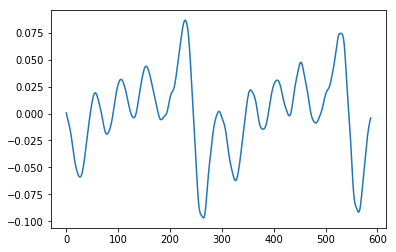

In [21]:
plt.figure()
plt.plot(detSig)
plt.show()

The Number of wave: 666


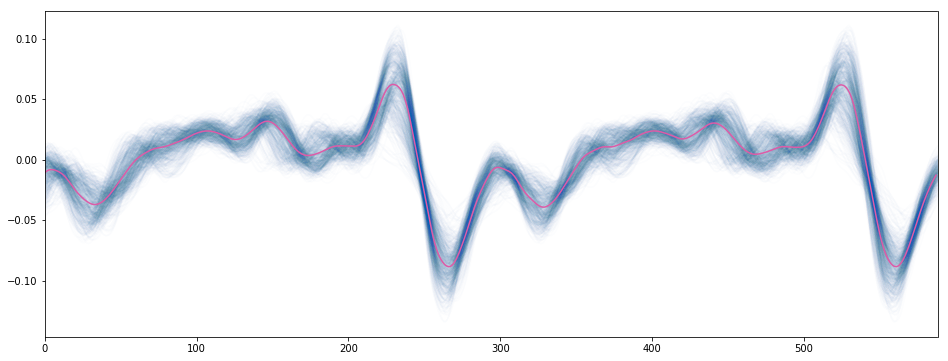

In [23]:
plt.figure(figsize=(16, 6))

meanDetSig = detSig / len(x_)

for i in range(0, len(x_) - 2):
    plt.plot(y[x_[i]:x_[i+2]], color=(3/255, 96/255, 176/255, 0.01))
    meanDetSig = meanDetSig + y[x_[i]:x_[i] + len(meanDetSig)]/len(x_)
    
plt.plot(meanDetSig, color=(222/255, 91/255, 167/255))
    
print('The Number of wave: {}'.format(len(x_)))
plt.xlim([0, len(detSig)])
plt.show()

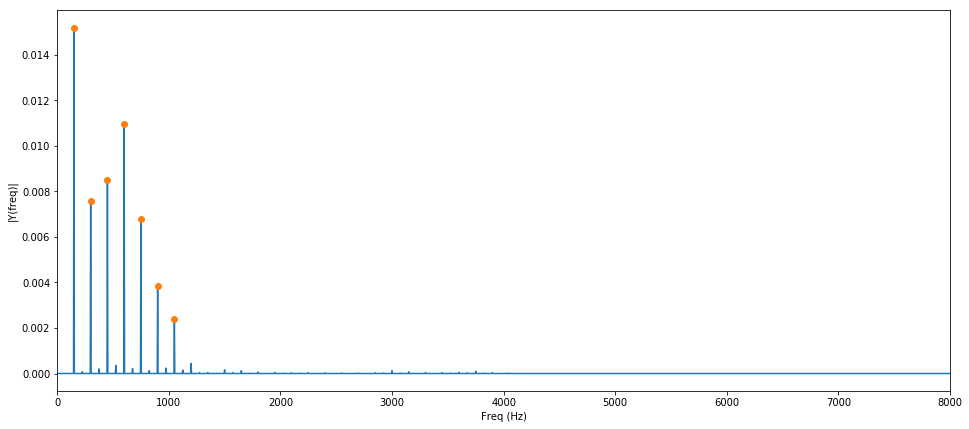

In [259]:
dt = 1.0/fs

dupSig = np.tile(meanDetSig, 20)

time = np.arange(0, len(dupSig)/fs, dt)

n = len(dupSig) 
k = np.arange(n)
T = n/fs
freq = k/T 
freq = freq[range(np.int(n/2))]
Y = np.fft.fft(dupSig)
Y_ = Y[range(np.int(n/2))]/n

plt.figure(figsize=(16, 7))
plt.plot(freq, abs(Y_)) 
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')
plt.xlim([0, 8000])

x, _ = find_peaks(abs(Y_), height=0.002)
plt.plot(freq[x], abs(Y_)[x], 'o')
plt.show()

In [243]:
x

array([ 40,  80, 120, 160, 200, 240, 280], dtype=int64)

In [226]:
from scipy.fftpack import ifft

In [227]:
from scipy import signal

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


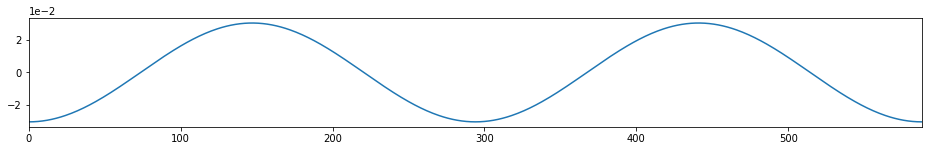

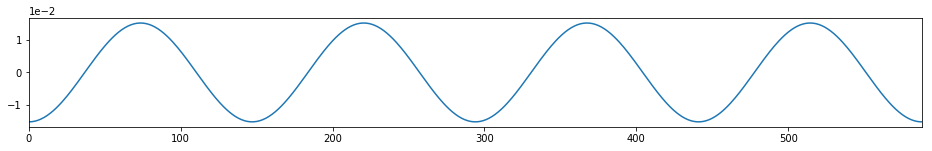

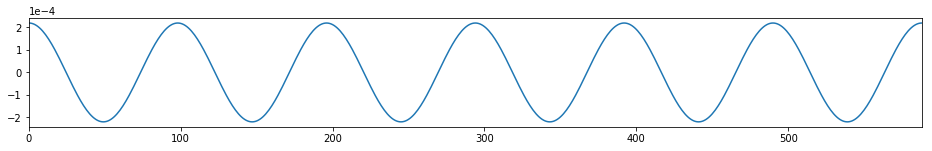

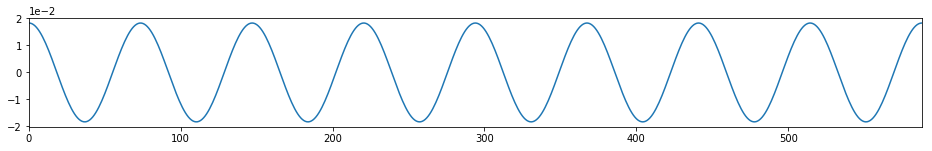

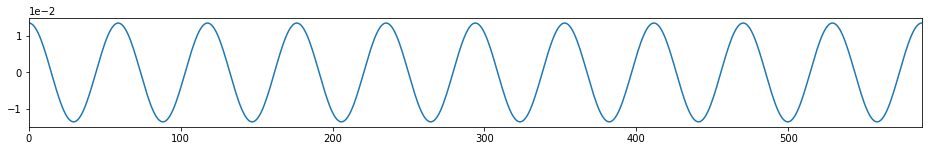

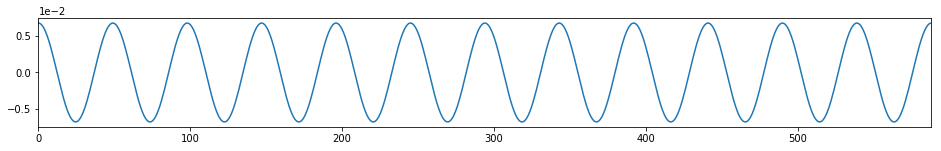

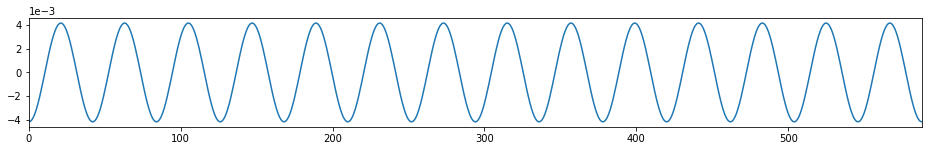

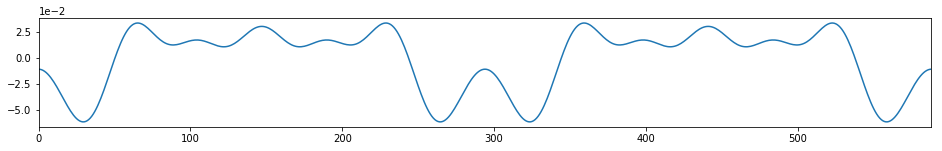

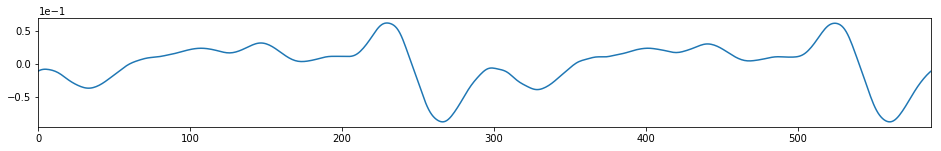

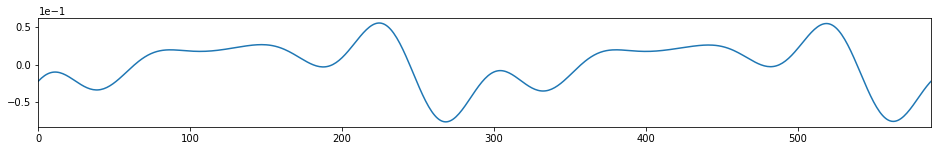

In [260]:
dum = np.zeros(len(dupSig))
lenDum = len(dum)

for i in range(0, len(x)):
    plt.figure(figsize=(16, 2))
    dummy = np.zeros(Y.shape)
    startIdx = x[i] - 10
    lastIdx = x[i] + 10
    dummy[startIdx:lastIdx] = Y[startIdx:lastIdx]
    dummy[lenDum - lastIdx:lenDum - startIdx] = Y[lenDum - lastIdx:lenDum - startIdx]
    invSig = ifft(dummy)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(1, 4))
    plt.plot(invSig)
    plt.xlim([0, len(detSig)])
    dum = dum + invSig
    plt.show()
    
plt.figure(figsize=(16, 2))
plt.ticklabel_format(style='sci', axis='y', scilimits=(1, 4))
plt.plot(dum)
plt.xlim([0, len(detSig)])
plt.show()

plt.figure(figsize=(16, 2))
plt.ticklabel_format(style='sci', axis='y', scilimits=(1, 4))
plt.plot(dupSig)
plt.xlim([0, len(detSig)])
plt.show()

plt.figure(figsize=(16, 2))
plt.ticklabel_format(style='sci', axis='y', scilimits=(1, 4))
Y__ = np.asarray(Y)
Y__[200:-200] = 0
plt.plot(ifft(Y__))
plt.xlim([0, len(detSig)])
plt.show()